# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
X, Y = fetch_openml('mnist_784', return_X_y=True , cache=False)
Y = Y.astype(int)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape: ', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape:  (70000,)


**(1)** Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

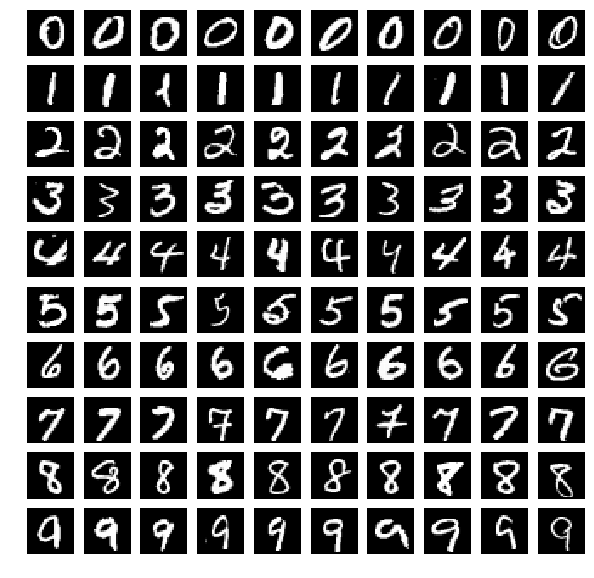

In [3]:
def P1(num_examples=10):

### STUDENT START ###

    # Figure
    fig = plt.figure(figsize = (num_examples,10))

    digit = 0
    count = 0
    i = 0

    # Visualize 10 example of each digit
    while count < 10 * num_examples:

        if train_labels[i] == digit:

            # Reshape digit matrix
            display_digit = train_data[i].reshape(28,28)

            # Add digit representation as subplot
            ax = fig.add_subplot(10, num_examples, count+1)

            # Display
            plt.axis('off')
            plt.imshow(display_digit, cmap='gray')

            count += 1

            # Increment digit by one after 10 iterations of previous digit
            if count >= (num_examples-1) and (count/num_examples) - 1 == digit:
                digit += 1

        i += 1

### STUDENT END ###

P1(10)

**(2)** Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

Classification Report for K = 1
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Overall accuracy (%):
K(1) = 88.4
K(3) = 87.6
K(5) = 88.2
K(7) = 87.7
K(9) = 87.5


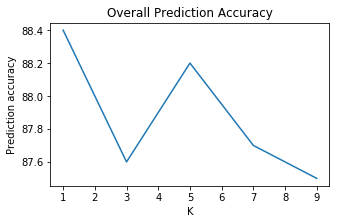

In [4]:
def P2(k_values):

### STUDENT START ###

    misclassified = []
    accuracy = []

    # K-Nearest-Neighbors
    for k in k_values:

        # Fit model and predict - train on mini, predict on dev.
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(mini_train_data, mini_train_labels)
        dev_predicted_labels = model.predict(dev_data)

        # Number misclassified for each k
        misclassified.append(sum(dev_labels != dev_predicted_labels))

        # Classification report for K = 1
        if k == 1:
            print('Classification Report for K =', k)
            print(classification_report(dev_labels, dev_predicted_labels))

    # Prediction accuracy
    for val in misclassified:
        accuracy.append((1 - val / len(dev_data))*100)

    # Plot accuracy
    fig, ax = plt.subplots(figsize = (5,3))
    plt.plot(k_values, accuracy)

    ax.set_title('Overall Prediction Accuracy')
    plt.ylabel('Prediction accuracy')
    plt.xlabel('K')
    
    # Overall accuracy
    print('Overall accuracy (%):')
    for i in range(len(k_values)):
        print('K({}) = {}'.format(k_values[i], accuracy[i]))
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

**ANSWER:**

The overall accuracy of the K-Nearest-Neighbors model varies with different K. The above plot shows that the overall accuracy is greatest for K=1 (88.4%) and least for K=9 (87.5%). There is however no clear declining trend as K increases due the secondary peak where K=5.  Additionally the difference in overall accuracy between the best and worse performing K is less than 1%, indicating that there isn't a great deal of variability for the selected values of K, at least overall.

The classification report for K=1 suggests that the number 8 posed the greatest challenge for the classifier.  This digit has the lowest recall and F1-score, and the second lowest precision of all digits.

 - Precision:  the ability to not misclassify a negative sample as positive.
 - Recall:  the ability to find all positive samples for a given label.
 - F1-score:  the weighted average of precision and recall. 


**(3)** Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    k = 1
    misclassified = []
    times = []

    # K-Nearest-Neighbors
    for size in train_sizes:

        start = time.time()

        # Fit model and predict - train different sizes, predict on dev.
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(train_data[:size], train_labels[:size])
        dev_predicted_labels = model.predict(dev_data)

        end = time.time()

        # Number misclassified for each k
        misclassified.append(sum(dev_labels != dev_predicted_labels))
        times.append(end - start)

    # Prediction accuracy
    for val in misclassified:
        accuracies.append((1 - val / len(dev_data))*100)

    # Print accuracy and run times
    print('{0:>7s} {1:>15s} {2:>13s}'.format('Size', 'Accuracy(%)', 'Time(s)'))
    for i in range(len(train_sizes)):
        print('{0:>7d} {1:14.1f} {2:13.2f}'.format(train_sizes[i], accuracies[i], times[i]))  
        
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

   Size     Accuracy(%)       Time(s)
    100           70.2          0.14
    200           79.1          0.23
    400           81.1          0.44
    800           86.6          0.89
   1600           90.5          1.78
   3200           92.7          3.62
   6400           93.9          7.30
  12800           95.2         14.99
  25000           96.2         33.44


**(4)** Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Predicted accuracy: 124.47%
Predicted accuracy of tranformed: 99.02%


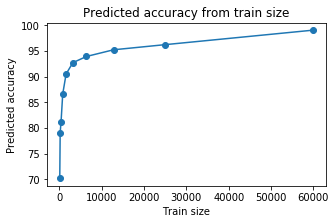

In [6]:
def P4():

### STUDENT START ###

    test_size = np.array([[60000]])

    # Reshape training inputs
    train_size = np.array(train_sizes).reshape(-1, 1)
    accuracy = np.array(accuracies).reshape(-1, 1)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(train_size, accuracy)
    predict = model.predict(test_size)

    print('Predicted accuracy: {0:.2f}%'.format(predict[0][0]))

    # Transform X so values converge towards 1
    train_sizes_modified = [1 / np.log(val) for val in train_sizes]
    test_size_modified = [1 / np.log(val) for val in test_size]

    # Reshape transformed inputs
    train_sizes_modified = np.array(train_sizes_modified).reshape(-1,1)
    test_size_modified = np.array(test_size_modified).reshape(-1,1)

    # Fit the linear regression model
    model2 = LinearRegression()
    model2.fit(train_sizes_modified, accuracies)
    predict_modified = model2.predict(test_size_modified)

    # Full data
    train_full = np.append(train_sizes, test_size)
    accuracies_full = np.append(accuracies, predict_modified)

    # Plot accuracy against train_size
    fig, ax = plt.subplots(figsize=(5,3))
    ax.plot(train_full, accuracies_full, '-o')

    ax.set_title('Predicted accuracy from train size')
    ax.set_xlabel('Train size')
    ax.set_ylabel('Predicted accuracy')

    print('Predicted accuracy of tranformed: {0:.2f}%'.format(predict_modified[0]))

### STUDENT END ###

P4()

**ANSWER:**

The issue with using linear regression to predict accuracy using differents training sizes stems from the fact that the output variable is a percentage.  Predicted results should therefore remain within the range of 0 and 1 however given the high accuracy for smaller training sizes, when we use linear regression to predict the accuracy of a larger training size the model returns an improbable probability exceeding 1, i.e. the predictions are not bounded.

It was therefore necessary to transform the data before fitting a second linear regression model, using the function $\frac{1}{log(n)}$.  The effect is that as training size increases, the transformed values of X will converge towards (but never exceed) 1.  Fitting a second linear regression model using the transformed data then results in predicted accuracies (Y) that follow the same pattern, thereby ensuring that for larger training sizes the model predicts greater accuracies, without exceeding the threshold of 1.

**(5)** Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]

Example mistakes:


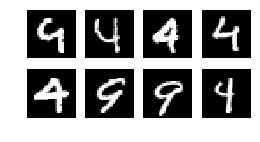

In [7]:
def P5():

### STUDENT START ###

    k = 1

    # Fit model and predict - train different sizes, predict on dev.
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(mini_train_data, mini_train_labels)
    dev_predicted_labels = model.predict(dev_data)

    # Confusion matrix
    mtx = confusion_matrix(dev_labels, dev_predicted_labels)
    print(mtx)

    # The most confused pair of digits are 4 and 9, with 14 incorrect
    # predictions in total (11 false positives and 3 false negatives).
    # While the digits 8 and 2 resulted in the joint most incorrect
    # predictions (22 in total) no single pair of digits caused
    # more confusion than digits 4 and 9.

    print('\nExample mistakes:')

    fig = plt.figure(figsize = (4,2))

    count = 0
    i = 0

    # Visualize incorrect digit pairs:
    while count < 8:

        if dev_labels[i] in [4,9] and dev_predicted_labels[i] in [4,9] and dev_labels[i] != dev_predicted_labels[i]:

            # Reshape digit matrix
            display_digit = dev_data[i].reshape(28,28)

            # Add digit representation as subplot
            ax = fig.add_subplot(2, 4, count+1)

            # Display
            plt.axis('off')
            plt.imshow(display_digit, cmap=plt.get_cmap('gray'))

            count += 1

        i += 1

### STUDENT END ###

P5()

**(6)** A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [8]:
def gaussian_blur(training_data):
    '''Implements a simplified gaussian blur by taking the weighted
    average of the surrounding 8 pixels for each pixel.
    '''

    # Add boundery to ensure each pixel has 8 neighbouring pixels
    add_sides = np.array([[0] for i in range(28)])

    # Range increased by two to account for extra width
    add_ends = np.array([[0 for i in range(28 + 2)]])

    blurred = []

    # Loop through training dataset
    for digit in training_data:

        # Reshape digit and create copy for blurring
        digit = digit.reshape(28,28)
        blurred_digit = digit.copy()

        # Add boundry box to current digit
        digit = np.concatenate((add_sides, digit, add_sides), axis=1)
        digit = np.concatenate((add_ends, digit, add_ends), axis=0)

        # Iterate across all pixels in the image and for each,
        # take the weighted average of the surrounding pixel
        # values, i.e. mean of the surrounding pixels.
        
        # When looping, rows and columns are offset to ensure that
        # only pixels in the original 28*28 matrix are blurred
        for row in range(1,28):
            for col in range(1,28):

                # Calculate the mean of the surrounding 8 pixels,
                # including the added boundries of zeros.
                blurred_digit[row,col] = digit[row-1:row+2,col-1:col+2].mean()

        blurred.append(blurred_digit.reshape(784))

    return np.asarray(blurred)

In [9]:
def show_digit():
    '''Display the original and blurred version of an
    arbitrary sample digit from mini_train_data.
    '''

    print('Original digit and its blurred version:')
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (4,4))

    # Reshape digit matrix
    digit = mini_train_data[0].reshape(28,28)
    blurred_digit = gaussian_blur(np.array([mini_train_data[0]]))

    # Display digit
    ax1.axis('off')
    ax1.imshow(digit, cmap='gray')

    # Display blurred digit
    ax2.axis('off')
    ax2.imshow(blurred_digit[0].reshape(28,28), cmap='gray')

In [10]:
def knn(training_data, training_labels, testing_data, testing_labels):
    '''Accepts list inputs of training_data, training_labels, 
    testing_data and testing labels.  Outputs the accuracy of
    the model based on input supplied.
    '''
    
    # Fit model and predict - train on mini, predict on dev.
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(training_data, training_labels)
    accuracy = model.score(testing_data, testing_labels)
    print('Accuracy: {} \n'.format(accuracy))


Preprocess mini train
Accuracy: 0.782 

Preprocess dev data
Accuracy: 0.701 

Preprocess mini and dev data
Accuracy: 0.905 

Original digit and its blurred version:


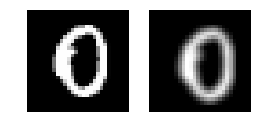

In [11]:
def P6():

### STUDENT START ###

    # Preprocess mini train data 
    print('Preprocess mini train')
    knn(gaussian_blur(mini_train_data), mini_train_labels, dev_data, dev_labels)

    # Preprocess dev data
    print('Preprocess dev data')
    knn(mini_train_data, mini_train_labels, gaussian_blur(dev_data), dev_labels)

    # Preprocess both mini train and dev data
    print('Preprocess mini and dev data')
    knn(gaussian_blur(mini_train_data), mini_train_labels, gaussian_blur(dev_data), dev_labels)
    
    show_digit()

### STUDENT END ###

P6()

**ANSWER:**

The original accuracy of the K-Nearest Neighbors model (for k=1) was 0.884 so this is the baseline accuracy that the various preprocessing methods shall be compared against.  When:
1. only mini trian data was preprocessed the accuracy decreased to 0.782 (-0.012)
2. only dev data was preprocessed the accuracy decreased to 0.701 (-0.183)
3. both mini train data and dev data were preprocessed the accuracy increased to 0.905 (+0.021)

The reason we observe a decline in accuracy when only mini train data is blurred is due to the fact that this results in two datasets that are more dissimilar in nature, meaning that the model fitted to the training data doesn't generalize so well to the test data (i.e. dev data in this case).

When only the dev data was blurred we now observe an even greater declined in accuracy.  The advantage of blurring is that it helps to smooth your dataset, thereby making certain patterns clearer by effectively softening the distinctions between neighboring pixel intensities.  However when a model is trained on original data but predicts on blurred data, it's effectively the worst of both worlds.  You have a model that was trained on the original data (i.e. using sharper intensities, potentially masking the underlying pattern of your data) and as such it doesn't generalize so well when predicting on data more dissimilar to it.

Finally, when both the training data and test data were blurred this improved the overall accuracy of the model.  This time we have the best of both worlds - blurring has been applied to each dataset making some of the underlying patterns clearer during both the training and classification process.  This results in a more accurate model because it can better identify the similarities between the datasets. 

**(7)** Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

BernoulliNB accuracy: 0.822
MultinomialNB accuracy: 0.816


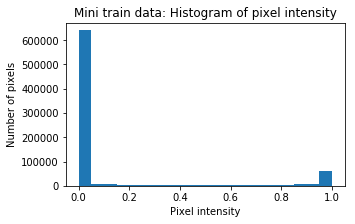

In [12]:
def P7():

### STUDENT START ###

    # Plot pixel intensity histogram to identify thresholds
    fig, ax = plt.subplots(figsize=(5,3))
    ax.hist(mini_train_data.ravel(), bins=20)

    ax.set_title('Mini train data: Histogram of pixel intensity')
    ax.set_xlabel('Pixel intensity')
    ax.set_ylabel('Number of pixels')

    # Binarize threshold of 0.5 is selected, following
    # inspection of the pixel intensity histogram
    threshold = 0.5

    # Binarize data
    binarized_mini_train_data = np.where(mini_train_data > threshold, 1, 0)
    binarized_dev_data = np.where(dev_data > threshold, 1, 0)

    # Fit Bernoulli model
    model = BernoulliNB(alpha=0.5)
    model.fit(binarized_mini_train_data, mini_train_labels)
    
    print('BernoulliNB accuracy: {}'.format(model.score(binarized_dev_data, dev_labels)))

    # Multi thresholds
    low_threshold = 0.3
    high_threshold = 0.7

    # Multiple values data
    multi_mini_train_data = np.where(mini_train_data > high_threshold, 2, 
                                     np.where(mini_train_data < low_threshold, 0, 1))

    multi_dev_data = np.where(dev_data > high_threshold, 2,
                              np.where(dev_data < low_threshold, 0, 1))

    # Fit Multinomial model and predict
    multi_model = MultinomialNB(alpha=0.5)
    multi_model.fit(multi_mini_train_data, mini_train_labels)
    
    
    multi_model.score(multi_dev_data, dev_labels)

    print('MultinomialNB accuracy: {}'.format(multi_model.score(multi_dev_data, dev_labels)))

### STUDENT END ###

P7()

**ANSWER:**

Using Multinomial Naive Bayes resulted in a slight decrease in prediction accuracy (+ 0.6%), when compared to Bernoulli Naive Bayes. This can be attributed to the fact that these models counts the presence/absence of certain features slightly differently.  The BernoulliNB counts the number of times that a single feature is present/not-present while the MultinomialNB creates counts for the values of features that are present.  

In the multinomial model, creating an additional category for pixel color is to the detriment of our model’s prediction accuracy.  This indicates that pixels categorized as grey do not convey any meaningful information that can be used to help predict the correct label for our samples.  This suggests we are somewhat overfitting when we apply the MultinomialNB in this way, because we are now modeling additional noise within our data, resulting in a model that doesn’t generalize quite as well as the BernoulliNB variant.

**(8)** Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [13]:
def P8(alphas):

### STUDENT START ###
    
    model = BernoulliNB()
    parameters = [{'alpha': alphas['alpha']}]
    
    # Fit model using GridSearch
    grid_search = GridSearchCV(model, parameters, cv=2)
    grid_search.fit(mini_train_data, mini_train_labels)
    
    # Best score/alpha
    print('Best alpha:', grid_search.best_params_['alpha'])
    print('With score:', grid_search.score(dev_data, dev_labels), '\n')
    
    results = grid_search.cv_results_
    
    # Print scores for each alpha
    print('{0:>7s} {1:>15s} {2:>13s}'.format('Alpha', 'Test score', 'Rank'))
    
    for i in range(len(alphas['alpha'])):
        print('{0:7.4f} {1:15.3f} {2:13d}'.format(results['params'][i]['alpha'],
                                                   results['mean_test_score'][i],
                                                   results['rank_test_score'][i]))

    return grid_search

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)


C:\Users\rossm\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rossm\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Best alpha: 0.1
With score: 0.822 

  Alpha      Test score          Rank
 0.0000           0.790             8
 0.0001           0.813             6
 0.0010           0.814             5
 0.0100           0.818             2
 0.1000           0.822             1
 0.5000           0.817             3
 1.0000           0.815             4
 2.0000           0.803             7
10.0000           0.760             9


**ANSWER:**

The best value for alpha, as identified by grid search, is 0.1 which resulting an overall accuracy of 82.2%  When alpha=0, the overall accuracy was 79.0% which resulted in the second lowest accuracy of those alphas passed to GrideSearchCV. Initially, I would have expected there to be no smoothing effect however it seems Naive Bayes does not accept an alpha of zero, and as such replaces it with a very small alpha.  

On reflection this makes sense because the addition of Laplace smoothing helps to ensure we are not overfitting the data.  For instance, when we train our Naive Bayes model on some training data there may be some events where $P(X | Y) = 0$.  In such cases, we are stating that a particular event will never happen, although it's quite possible that the event simply didn't occur in our training set, yet it quite plausible.  By adding a small alpha using Laplace smoothing we are effectively accounting for such occurances by subscribing a very small probability to these highly unlikely events.  In short, just because we didn't see a particular event in our training data, it doesn't mean it's impossible for the event to occur.  Laplace smoothing accounts for this possibility.


**(9)** Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

GaussianNB: 0.593
GaussianNB standardized: 0.82


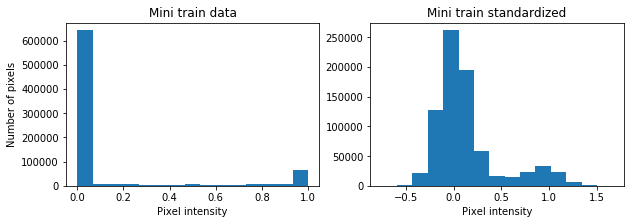

In [14]:
def P9():

### STUDENT END ###

    # Fit GaussianNB model
    model = GaussianNB()
    model.fit(mini_train_data, mini_train_labels)
    print('GaussianNB:', model.score(dev_data, dev_labels))

    sigma = 0.15

    # Add random normal noise
    normal_mini_data = mini_train_data + np.random.normal(0, sigma, mini_train_data.shape)
    normal_dev_data = dev_data + np.random.normal(0, sigma, dev_data.shape)

    # Fit GaussianNB using standardized data 
    model2 = GaussianNB()
    model2.fit(normal_mini_data, mini_train_labels)
    print('GaussianNB standardized:', model2.score(normal_dev_data, dev_labels))

    # Plot distributions pre/post standardization
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,3))

    ax1.set_title('Mini train data')
    ax1.set_xlabel('Pixel intensity')
    ax1.set_ylabel('Number of pixels')

    ax2.set_title('Mini train standardized')
    ax2.set_xlabel('Pixel intensity')

    ax1.hist(mini_train_data.ravel(), bins=15)
    ax2.hist(normal_mini_data.ravel(), bins=15)

### STUDENT END ###

gnb = P9()

**ANSWER:**

The Gaussian Naive Bayes model works with continuous data, providing that the assumption of normality is met.  As we can see the distribution of pixel densities across mini_train_data is highly non-normal with the vast majority of pixels having a value of zero, a smaller proportion with value of 1, and few pixels with densities inbetween. As a result, the Gaussian Naive Bayes model yields poorer accuracy because the training data does not meet the assumption of normality, i.e. the data does not fit the model well. 

To account for this, mini_train_data and dev_data were combined with random (normally distributed) noise in order to achieve a distribution that is more normal/Gaussian. Following this transformation the resulting accuracy of the Gaussian Naive Bayes increased to approximately 82%, as the underlying data now meets the assumption of normality.

**(10)** Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

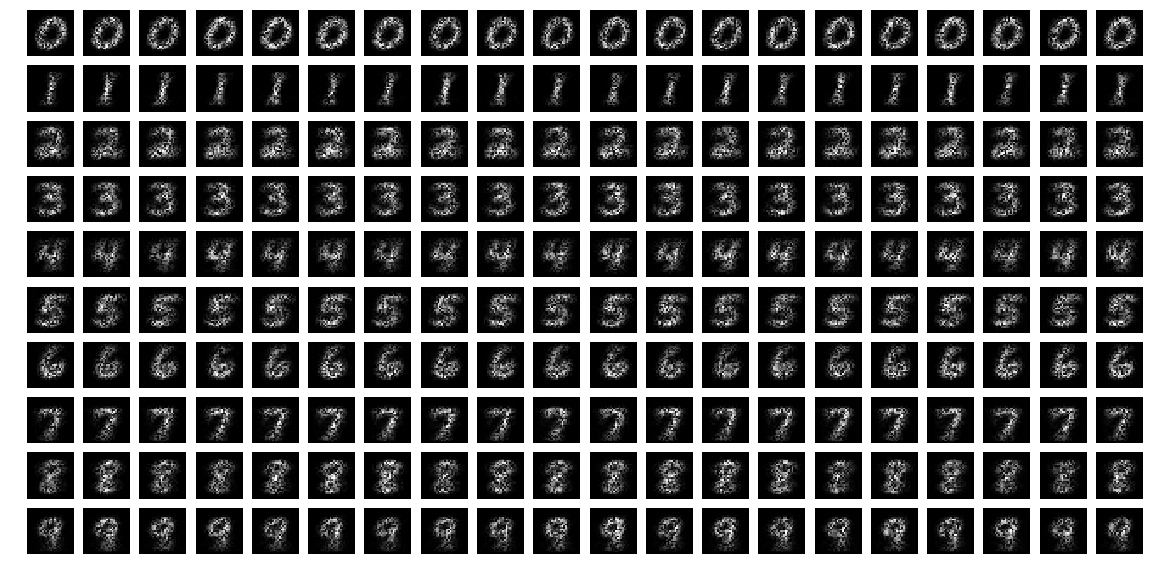

In [15]:
def P10(num_examples):

### STUDENT START ###

    threshold = 0.5

    # Binarize data
    binarized_mini_train_data = np.where(mini_train_data > threshold, 1, 0)
    binarized_dev_data = np.where(dev_data > threshold, 1, 0)

    # Fit Bernoulli model
    model = BernoulliNB(alpha=0.5)
    model.fit(binarized_mini_train_data, mini_train_labels)

    # Figure
    fig = plt.figure(figsize = (num_examples,10))

    digit = 0
    count = 0
    i = 0

    # Visualize 10 example of each digit
    while count < 10 * num_examples:

        # Select images of current digit
        if train_labels[i] == digit:

            # Generate digits from conditional probs
            new_digit = np.array(np.exp(model.feature_log_prob_[digit]).reshape(28,28) * np.random.rand(28,28))

            # Add digit representation as subplot
            ax = fig.add_subplot(10, num_examples, count+1)

            # Display
            plt.axis('off')
            plt.imshow(new_digit, cmap='gray')

            count += 1

            # Increment digit by one after 10 iterations of previous digit
            if count >= (num_examples-1) and (count/num_examples) - 1 == digit:
                digit += 1

        i += 1

### STUDENT END ###

P10(20)

**ANSWER:**

The generated digits are less clear when compared to the training digits because their images are constructed using the conditional probabilties of each pixel being 0 or 1 (for a given digit).  The conditional probability assigned to each pixel captures the variation across all samples passed to the Bernoulli model upon fitting. For each digit, while the samples passed to the model will likely resemble each other in terms of overall shape, each is slightly different with its own variations in term of pixel intensity.  It is these variations that contribute to different probabilities assigned to each pixel position.  This results in more faint/fuzzy digits when combined with the random pixel values generated in the above code.

To summarize, the generated digits are less clear because they are based on the conditional probabilities of each pixel, and the conditional probabilities reflect the likelihood of a given pixel being a 0 or 1, given all the variation present in the fitted samples. The clearer the generated image, the less variation present across all samples passed to the fitted model.

**(11)** Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  41    accuracy = 0.317
p(pred) <= 0.9990000000000    total =  81    accuracy = 0.506
p(pred) <= 0.9999900000000    total =  76    accuracy = 0.632
p(pred) <= 0.9999999000000    total =  55    accuracy = 0.545
p(pred) <= 0.9999999990000    total =  58    accuracy = 0.672
p(pred) <= 0.9999999999900    total =  68    accuracy = 0.824
p(pred) <= 0.9999999999999    total =  44    accuracy = 0.818
p(pred) <= 1.0000000000000    total = 577    accuracy = 0.946


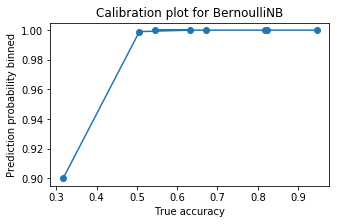

In [16]:
def P11(buckets, correct, total):

### STUDENT START ###

    threshold = 0.5

    # Binarize data
    binarized_mini_train_data = np.where(mini_train_data > threshold, 1, 0)
    binarized_dev_data = np.where(dev_data > threshold, 1, 0)

    # Fit Bernoulli model
    model = BernoulliNB(alpha=0.5)
    model.fit(binarized_mini_train_data, mini_train_labels)
    dev_predicted_labels = model.predict(dev_data)

    # All posterior probabilities
    dev_pred_probs = model.predict_proba(dev_data)

    posteriors = []

    # Posteriors for predictions only
    for i in range(dev_data.shape[0]):
        pred = np.argmax(model.predict_proba(dev_data)[i])
        posteriors.append(dev_pred_probs[i][pred])

    category = [0 for i in dev_data]    

    # Loop through dev predictions
    for i in range(dev_data.shape[0]):
    
        # Determine appropriate bucket
        for b in range(len(buckets)):
            if posteriors[i] <= buckets[0]:
                category[i] = 0
            elif posteriors[i] > buckets[b] and posteriors[i] <= buckets[b+1] and b != (len(buckets) - 1):
                category[i] = b+1

    # Increment counts for appropriate buckets
    for i in range(dev_data.shape[0]):

        bucket = category[i]
        total[bucket] += 1

        # Increment correct
        if dev_predicted_labels[i] == dev_labels[i]:
            correct[bucket] += 1

    # Prep for plot
    accuracy = [correct[i] / total[i] for i in range(len(buckets)) if total[i] > 0] 
    buckets_trim = [buckets[i] for i in range(len(buckets)) if total[i] > 0] 

    # Plot accuracy against posteriors
    fig, ax = plt.subplots(figsize=(5,3))
    ax.plot(accuracy, buckets_trim, '-o')

    ax.set_title('Calibration plot for BernoulliNB')
    ax.set_xlabel('True accuracy')
    ax.set_ylabel('Prediction probability binned')

### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) <= {:.13f}    total = {:3d}    accuracy = {:.3f}'.format(buckets[i], total[i], accuracy))

**ANSWER:**

The posterior probability of the predicted class does not appear to be well correlated with the true accuracy of the model.  When the posterior probability is between 0.900 and 0.999, the true accuracy of the classifier is only 0.506. I wondered if the selected bucket values were perhaps obscuring the nature of the relationship between the posteriors and true accuracy but when bucket increments of 0.10 were selected, it was clear there wasn't a strong relationship. It should however be noted that this model was trained and tested on relatively small datasets (n=1000) which is likely a contributing factor to the fluctuations observed.

It can also be seen that the accuracy of the classifier doesn't reliably increase as the posterior probability of the predicted class increases. There are two instances where an increase in the posterior probability of the predicted class results in a decrease in accuracy - another indicator that the model is not well calibrated.  Notably, as the posterior probability of the predicted class is not approximately the same as the true accuracy, then this classifier must be characterized as poorly calibrated.

**(12)** EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [17]:
#def P12():

### STUDENT START ###

### STUDENT END ###

#P12()